## Algorithm testing : 2

In [1]:
### here I am gonna test the models by dropping
### the both two columns failed_transaction_count_7d and risk_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### loading the data (distance)

In [16]:
df_distance = pd.read_csv('../data/distance_based.csv')
df_distance.head()

,Unnamed: 0,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,...,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox,Fraud_Label
0,0,0,0,1,1,0,0,0,1,0,...,0.931806,7,0.872714,3,65,0.176595,0.8494,0,0.325913,0
1,1,0,0,0,0,1,0,1,0,0,...,0.756044,13,0.956653,4,186,0.440650,0.0959,0,0.047409,1
2,2,0,1,0,0,0,1,0,0,0,...,0.010940,14,0.081653,4,226,0.381832,0.8400,0,0.286719,1
3,3,1,0,0,0,0,0,1,0,0,...,0.766918,8,0.352000,4,76,0.262339,0.7935,0,0.627847,1
4,4,0,0,1,0,1,1,0,0,0,...,0.923178,14,0.650388,4,140,0.193358,0.3819,1,0.295933,1


In [3]:
corelation = df_distance.corr()['Fraud_Label'].sort_values(ascending = False)
print(corelation)

Fraud_Label                        1.000000
Failed_Transaction_Count_7d        0.509871
Risk_Score                         0.385810
merchant_Restaurants               0.005285
auth_method_OTP                    0.004696
card_type_Discover                 0.004424
transaction_type_ATM Withdrawal    0.004392
location_New York                  0.003750
location_Tokyo                     0.003693
card_type_Amex                     0.003001
merchant_Travel                    0.001796
Avg_Transaction_Amount_7d          0.000703
Transaction_Amount_boxcox          0.000687
Is_Weekend                         0.000064
location_Sydney                    0.000056
transaction_type_Online           -0.000053
Transaction_Distance              -0.000116
merchant_Groceries                -0.000268
auth_method_Biometric             -0.000789
merchant_Electronics              -0.002207
device_type_Laptop                -0.002742
Card_Age                          -0.003120
Account_Balance                 

In [4]:
df_distance.drop(['Unnamed: 0', 'Risk_Score', 'Failed_Transaction_Count_7d'], axis = 1, inplace = True)
df_distance.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,card_type_Discover,card_type_Visa,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Card_Age,Transaction_Distance,Is_Weekend,Transaction_Amount_boxcox,Fraud_Label
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0.931806,7,0.872714,65,0.176595,0,0.325913,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0.756044,13,0.956653,186,0.440650,0,0.047409,1
2,0,1,0,0,0,1,0,0,0,0,...,0,1,0.010940,14,0.081653,226,0.381832,0,0.286719,1
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0.766918,8,0.352000,76,0.262339,0,0.627847,1
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0.923178,14,0.650388,140,0.193358,1,0.295933,1


In [17]:
X_distance = df_distance.drop('Fraud_Label', axis = 1)
y_distance = df_distance['Fraud_Label']

### loading the data (trees)

In [18]:
df_trees = pd.read_csv('../data/trees_based.csv')
df_trees.head()

,Unnamed: 0,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,...,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox,Fraud_Label
0,0,0,0,1,1,0,0,0,1,0,...,93213.17,7,437.63,3,65,883.17,0.8494,0,5.917374,0
1,1,0,0,0,0,1,0,1,0,0,...,75725.25,13,478.76,4,186,2203.36,0.0959,0,0.860767,1
2,2,0,1,0,0,0,1,0,0,0,...,1588.96,14,50.01,4,226,1909.29,0.8400,0,5.205741,1
3,3,1,0,0,0,0,0,1,0,0,...,76807.20,8,182.48,4,76,1311.86,0.7935,0,11.399354,1
4,4,0,0,1,0,1,1,0,0,0,...,92354.66,14,328.69,4,140,966.98,0.3819,1,5.373048,1


In [7]:
corr = df_trees.corr()['Fraud_Label'].sort_values(ascending = False)
print(corr)

Fraud_Label                        1.000000
Failed_Transaction_Count_7d        0.509871
Risk_Score                         0.385810
merchant_Restaurants               0.005285
auth_method_OTP                    0.004696
card_type_Discover                 0.004424
transaction_type_ATM Withdrawal    0.004392
location_New York                  0.003750
location_Tokyo                     0.003693
card_type_Amex                     0.003001
merchant_Travel                    0.001796
Avg_Transaction_Amount_7d          0.000703
Transaction_Amount_boxcox          0.000687
Is_Weekend                         0.000064
location_Sydney                    0.000056
transaction_type_Online           -0.000053
Transaction_Distance              -0.000116
merchant_Groceries                -0.000268
auth_method_Biometric             -0.000789
merchant_Electronics              -0.002207
device_type_Laptop                -0.002742
Card_Age                          -0.003120
Account_Balance                 

In [8]:
df_trees.drop(['Unnamed: 0', 'Failed_Transaction_Count_7d', 'Risk_Score'], axis = 1, inplace = True)
df_trees.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,card_type_Discover,card_type_Visa,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Card_Age,Transaction_Distance,Is_Weekend,Transaction_Amount_boxcox,Fraud_Label
0,0,0,1,1,0,0,0,1,0,0,...,0,0,93213.17,7,437.63,65,883.17,0,5.917374,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,75725.25,13,478.76,186,2203.36,0,0.860767,1
2,0,1,0,0,0,1,0,0,0,0,...,0,1,1588.96,14,50.01,226,1909.29,0,5.205741,1
3,1,0,0,0,0,0,1,0,0,0,...,0,1,76807.20,8,182.48,76,1311.86,0,11.399354,1
4,0,0,1,0,1,1,0,0,0,1,...,0,0,92354.66,14,328.69,140,966.98,1,5.373048,1


In [8]:
X_trees = df_trees.drop('Fraud_Label', axis = 1)
y_trees = df_trees['Fraud_Label']

### train, test split

In [10]:
from sklearn.model_selection import train_test_split
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y_distance, random_state = 42, test_size = 0.25)

In [11]:
print(f"{X_train_distance.shape} : {X_test_distance.shape} :: {y_train_distance.shape} : {y_test_distance.shape}")

(37500, 26) : (12500, 26) :: (37500,) : (12500,)


In [12]:
X_train_trees, X_test_trees, y_train_trees, y_test_trees = train_test_split(X_trees, y_trees, test_size = 0.25, random_state = 42)

In [13]:
print(f"{X_train_trees.shape} : {X_test_trees.shape} :: {y_train_trees.shape} : {y_test_trees.shape}")

(37500, 26) : (12500, 26) :: (37500,) : (12500,)


### writing the functions for the testing

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [10]:
def metrices(y_test, y_pred) : 
    print(f"accuracy_score : {accuracy_score(y_test, y_pred)}")
    print("Confusion matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [11]:
def plot_graphs(y_test, y_pred, y_prob = None) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    # --- 2️⃣ ROC Curve (only for binary classification) ---
    if y_prob is not None and len(set(y_test)) == 2:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
    else:
        plt.subplot(1, 2, 2)
        sns.histplot(y_pred, color='purple', bins=len(set(y_pred)))
        plt.title('Predicted Class Distribution')
        plt.xlabel('Predicted Class')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()    

In [12]:
def pred_and_plot(X_train, X_test, y_train, y_test, model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrices(y_test, y_pred)
    plot_graphs(y_test, y_pred)

### Algorithms

### Distance based

### 1. Logistic Regression

accuracy_score : 0.67584
Confusion matrix : 
[[8448    0]
 [4052    0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8448
           1       0.00      0.00      0.00      4052

    accuracy                           0.68     12500
   macro avg       0.34      0.50      0.40     12500
weighted avg       0.46      0.68      0.55     12500



c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


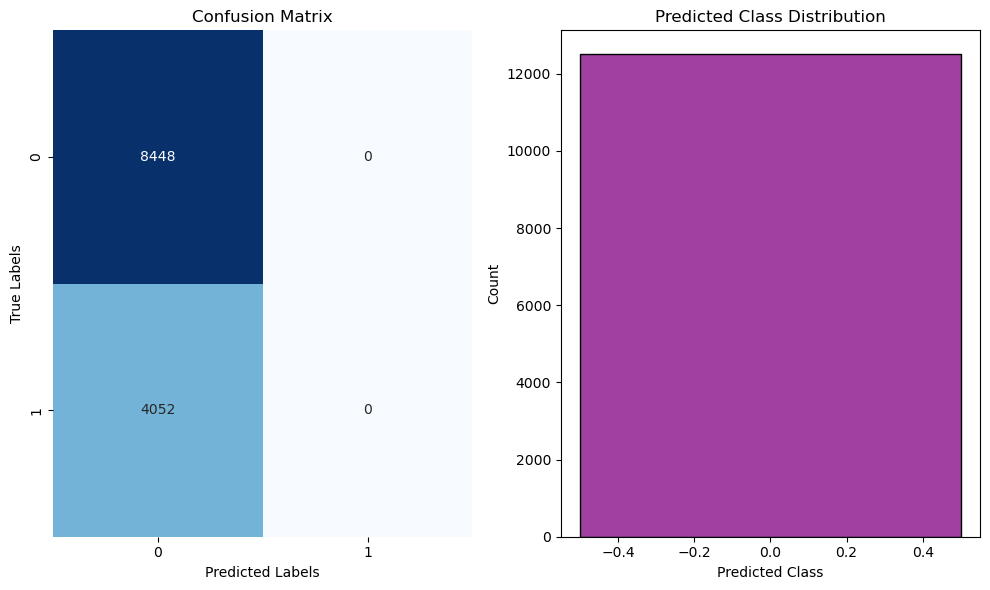

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, lr)

### 2. SVC

accuracy_score : 0.67584
Confusion matrix : 
[[8448    0]
 [4052    0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8448
           1       0.00      0.00      0.00      4052

    accuracy                           0.68     12500
   macro avg       0.34      0.50      0.40     12500
weighted avg       0.46      0.68      0.55     12500



c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


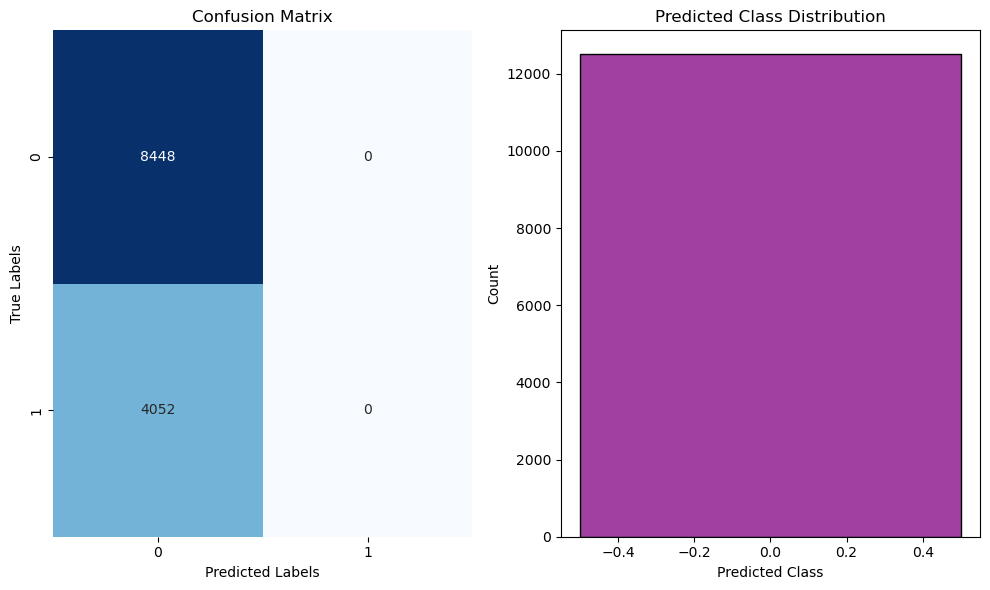

In [23]:
from sklearn.svm import SVC
svc = SVC()
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = svc)

### 3. KNN

accuracy_score : 0.61416
Confusion matrix : 
[[6875 1573]
 [3250  802]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      8448
           1       0.34      0.20      0.25      4052

    accuracy                           0.61     12500
   macro avg       0.51      0.51      0.49     12500
weighted avg       0.57      0.61      0.58     12500



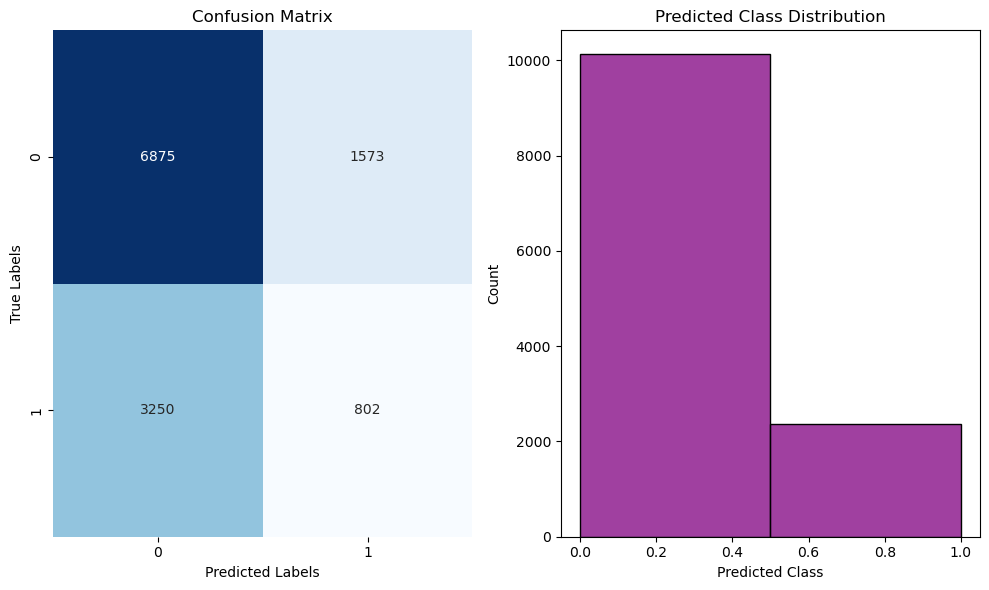

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = knn)

### Probablity based algo (Gausian NB)

accuracy_score : 0.67584
Confusion matrix : 
[[8448    0]
 [4052    0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8448
           1       0.00      0.00      0.00      4052

    accuracy                           0.68     12500
   macro avg       0.34      0.50      0.40     12500
weighted avg       0.46      0.68      0.55     12500



c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


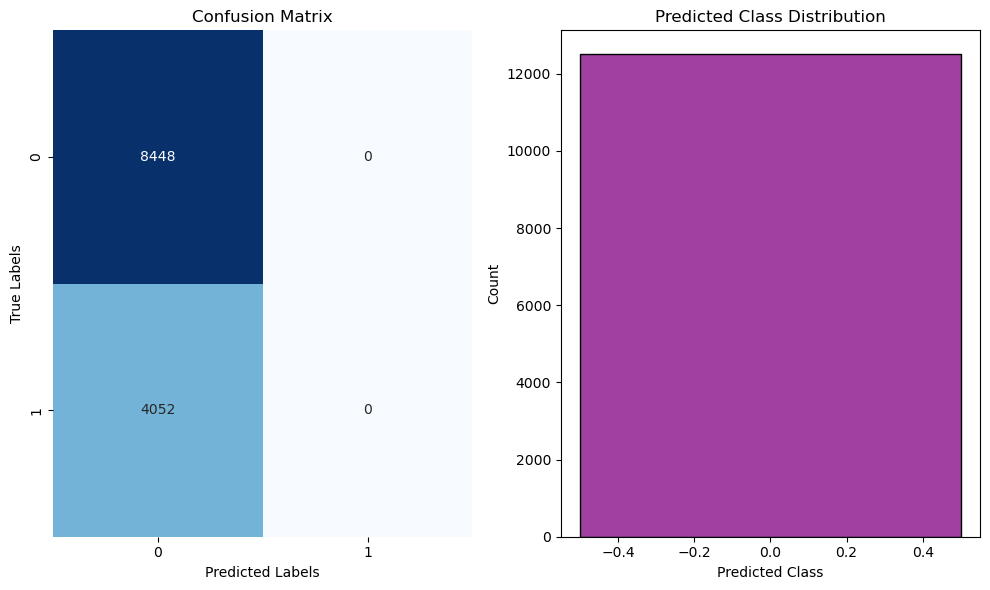

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_and_plot(X_train_trees, X_test_trees, y_train_trees, y_test_trees, model = gnb)

### Tree based algorithms

### 1. Decision Tree

accuracy_score : 0.55432
Confusion matrix : 
[[5582 2866]
 [2705 1347]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      8448
           1       0.32      0.33      0.33      4052

    accuracy                           0.55     12500
   macro avg       0.50      0.50      0.50     12500
weighted avg       0.56      0.55      0.56     12500



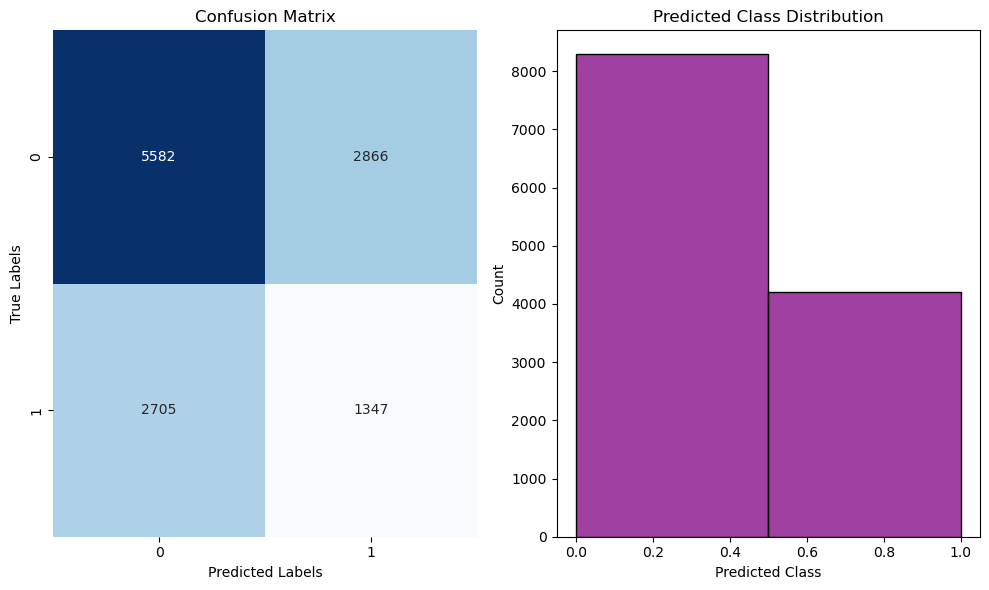

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
pred_and_plot(X_train_trees, X_test_trees, y_train_trees, y_test_trees, model = dtc)

### 2. Random forest classifier

accuracy_score : 0.67224
Confusion matrix : 
[[8386   62]
 [4035   17]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.80      8448
           1       0.22      0.00      0.01      4052

    accuracy                           0.67     12500
   macro avg       0.45      0.50      0.41     12500
weighted avg       0.53      0.67      0.55     12500



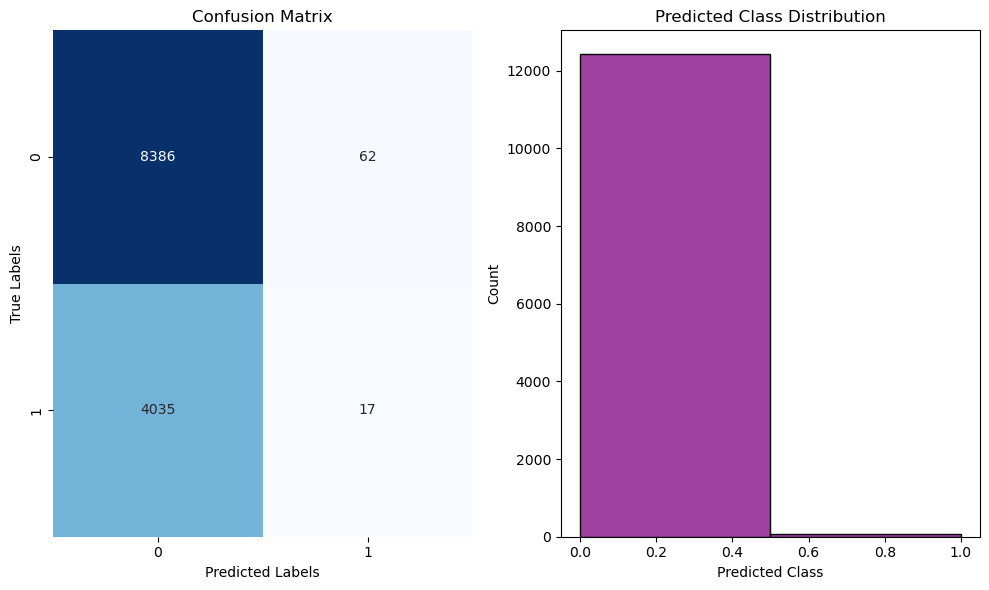

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
pred_and_plot(X_train_trees, X_test_trees, y_train_trees, y_test_trees, model = rfc)

### 3. Adaboost

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score : 0.6756
Confusion matrix : 
[[8441    7]
 [4048    4]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8448
           1       0.36      0.00      0.00      4052

    accuracy                           0.68     12500
   macro avg       0.52      0.50      0.40     12500
weighted avg       0.57      0.68      0.55     12500



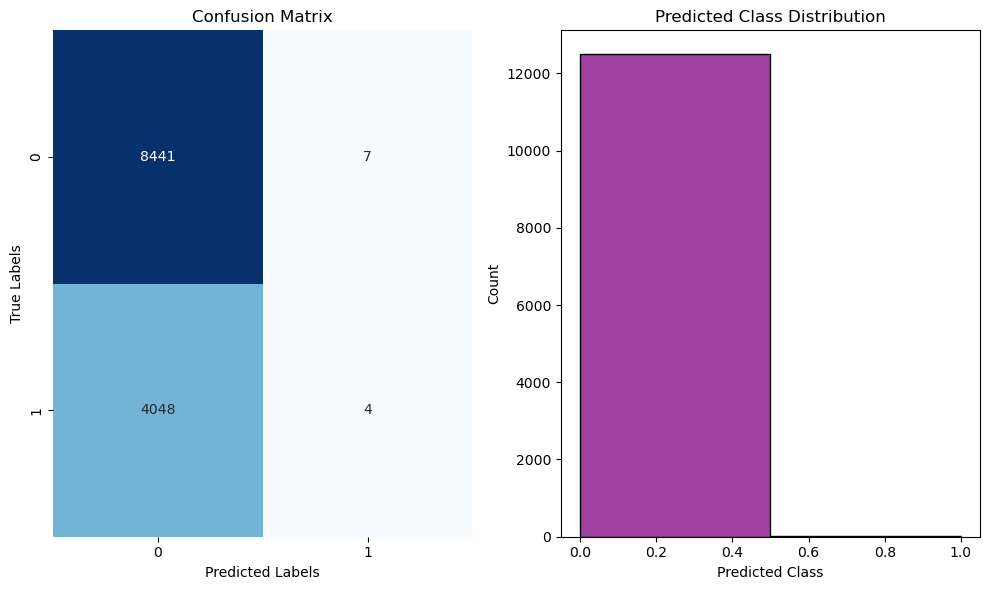

In [30]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
pred_and_plot(X_train_trees, X_test_trees, y_train_trees, y_test_trees, model = abc)

### Gradient boost

accuracy_score : 0.67488
Confusion matrix : 
[[8433   15]
 [4049    3]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8448
           1       0.17      0.00      0.00      4052

    accuracy                           0.67     12500
   macro avg       0.42      0.50      0.40     12500
weighted avg       0.51      0.67      0.55     12500



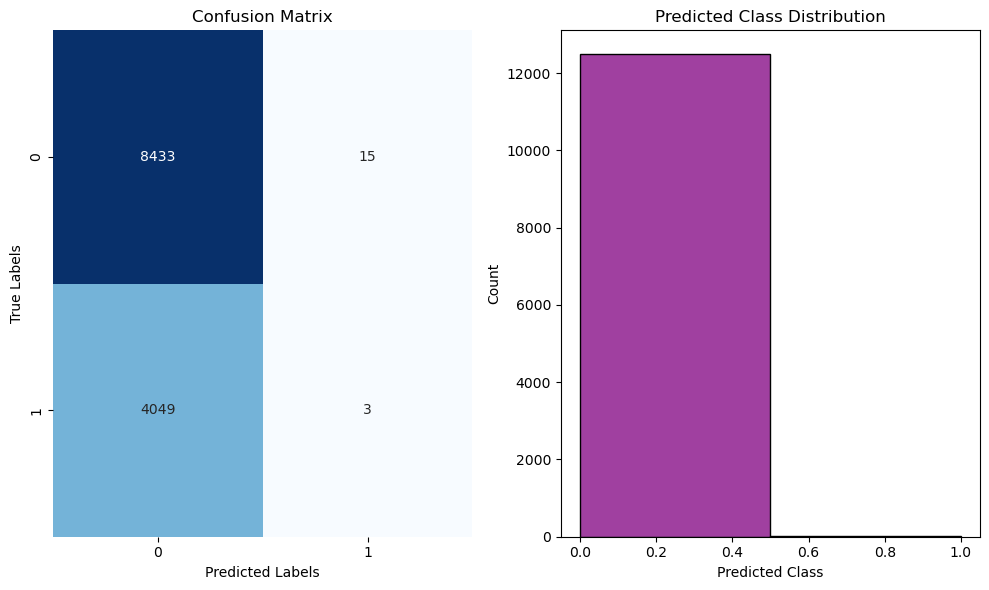

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
pred_and_plot(X_train_trees, X_test_trees, y_train_trees, y_test_trees, model = gbc)

### ANN : neural netwrok

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [33]:
model = Sequential()

In [35]:
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = X_train_trees.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,881 (136.25 KB)

 Trainable params: 34,881 (136.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train_distance, y_train_distance, batch_size = 128, epochs = 50, validation_split = 0.20)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6834 - loss: 0.6239 - val_accuracy: 0.6791 - val_loss: 0.6312
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6792 - loss: 0.6265 - val_accuracy: 0.6791 - val_loss: 0.6296
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6789 - loss: 0.6267 - val_accuracy: 0.6791 - val_loss: 0.6335
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6820 - loss: 0.6246 - val_accuracy: 0.6791 - val_loss: 0.6315
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6743 - loss: 0.6301 - val_accuracy: 0.6791 - val_loss: 0.6317
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6831 - loss: 0.6233 - val_accuracy: 0.6791 - val_loss: 0.6318
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6763 - loss: 0.6286 - val_accuracy: 0.6791 - val_loss: 0.6316
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6806 - loss: 0.6255 - val_accuracy: 0.

In [43]:
y_pred = model.predict(X_test_distance)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step


In [44]:
y_pred

array([[0.31325936],
       [0.31325936],
       [0.31325936],
       ...,
       [0.31325936],
       [0.31325936],
       [0.31325936]], dtype=float32)

In [45]:
y_pred = (y_pred > 0.3).astype(int)

In [46]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [47]:
metrices(y_test_distance, y_pred)

accuracy_score : 0.3316
Confusion matrix : 
[[ 149 8299]
 [  56 3996]]
              precision    recall  f1-score   support

           0       0.73      0.02      0.03      8448
           1       0.33      0.99      0.49      4052

    accuracy                           0.33     12500
   macro avg       0.53      0.50      0.26     12500
weighted avg       0.60      0.33      0.18     12500



### ------------------ end results ---------------------------------- 

In [48]:
### models are not learning the pattern itself it there's no feature
### that can be linked to the target feature

### -------------------- end results ----------------------------------------

## Algorithm testing : 3

In [49]:
### this time I am dropping either of those two features, one at a time

In [81]:
df_distance = pd.read_csv('../data/distance_based.csv')
df_trees = pd.read_csv('../data/trees_based.csv')

### Dropping the failed_transaction_count_7d column

In [82]:
X_distance = df_distance.drop('Fraud_Label', axis = 1)
y_distance = df_distance['Fraud_Label']

In [83]:
X_tree = df_trees.drop('Fraud_Label', axis = 1)
y_tree = df_trees['Fraud_Label']

In [28]:
X_distance.drop(['Unnamed: 0', 'Failed_Transaction_Count_7d'], axis = 1, inplace = True)
X_tree.drop(['Unnamed: 0', 'Failed_Transaction_Count_7d'], axis = 1, inplace = True)

In [30]:
X_distance.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,card_type_Discover,card_type_Visa,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0.931806,7,0.872714,65,0.176595,0.8494,0,0.325913
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0.756044,13,0.956653,186,0.440650,0.0959,0,0.047409
2,0,1,0,0,0,1,0,0,0,0,...,0,1,0.010940,14,0.081653,226,0.381832,0.8400,0,0.286719
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0.766918,8,0.352000,76,0.262339,0.7935,0,0.627847
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0.923178,14,0.650388,140,0.193358,0.3819,1,0.295933


In [31]:
X_tree.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,card_type_Discover,card_type_Visa,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox
0,0,0,1,1,0,0,0,1,0,0,...,0,0,93213.17,7,437.63,65,883.17,0.8494,0,5.917374
1,0,0,0,0,1,0,1,0,0,0,...,0,0,75725.25,13,478.76,186,2203.36,0.0959,0,0.860767
2,0,1,0,0,0,1,0,0,0,0,...,0,1,1588.96,14,50.01,226,1909.29,0.8400,0,5.205741
3,1,0,0,0,0,0,1,0,0,0,...,0,1,76807.20,8,182.48,76,1311.86,0.7935,0,11.399354
4,0,0,1,0,1,1,0,0,0,1,...,0,0,92354.66,14,328.69,140,966.98,0.3819,1,5.373048


In [32]:
from sklearn.model_selection import train_test_split
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y_distance, random_state = 42, test_size = 0.25)

In [33]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size = 0.25, random_state = 42)

In [34]:
print(f"{X_train_distance.shape} : {X_test_distance.shape} :: {y_train_distance.shape} : {y_test_distance.shape}")

(37500, 27) : (12500, 27) :: (37500,) : (12500,)


In [35]:
print(f"{X_train_tree.shape} : {X_test_tree.shape} :: {y_train_tree.shape} : {y_test_tree.shape}")

(37500, 27) : (12500, 27) :: (37500,) : (12500,)


### Testing the models

### Distance based

### 1. Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)

accuracy_score : 0.78632
Confusion matrix : 
[[7747  701]
 [1970 2082]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      8448
           1       0.75      0.51      0.61      4052

    accuracy                           0.79     12500
   macro avg       0.77      0.72      0.73     12500
weighted avg       0.78      0.79      0.77     12500



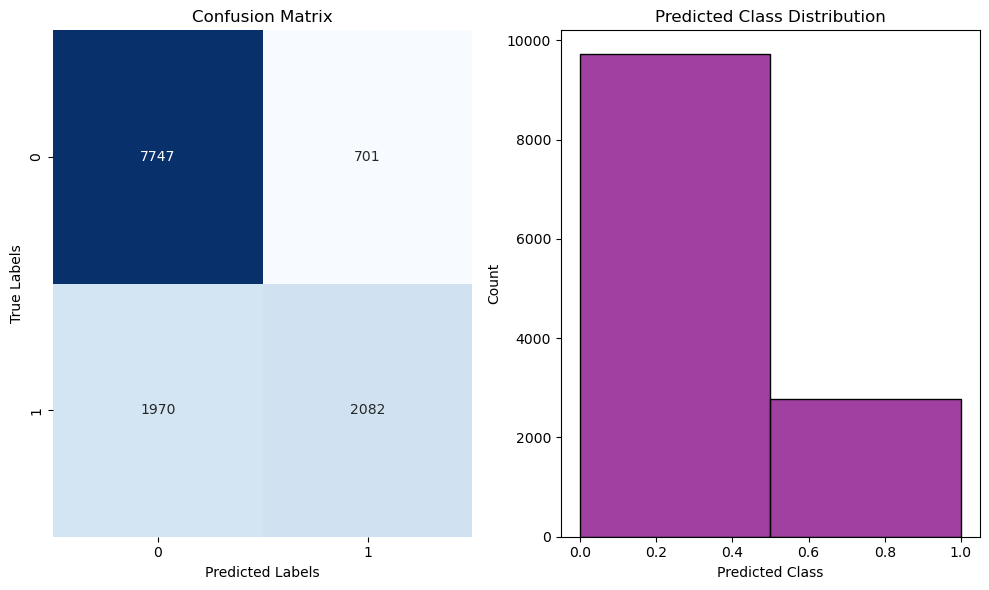

In [39]:
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = lr)

### 2. SVC

accuracy_score : 0.67584
Confusion matrix : 
[[8448    0]
 [4052    0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8448
           1       0.00      0.00      0.00      4052

    accuracy                           0.68     12500
   macro avg       0.34      0.50      0.40     12500
weighted avg       0.46      0.68      0.55     12500



c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


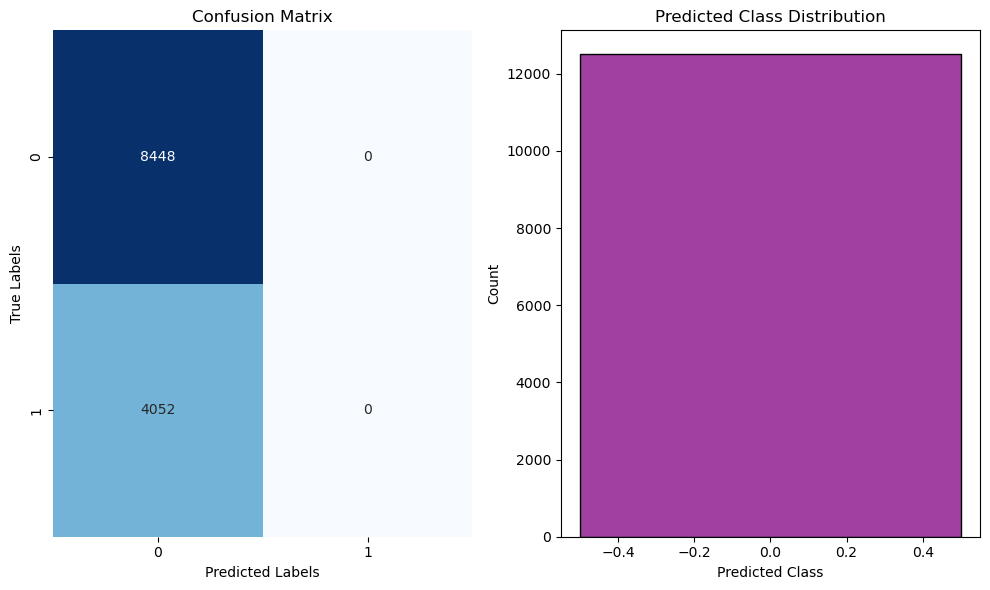

In [40]:
from sklearn.svm import SVC
svc = SVC()
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = svc)

### 3. KNN

accuracy_score : 0.63104
Confusion matrix : 
[[7047 1401]
 [3211  841]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      8448
           1       0.38      0.21      0.27      4052

    accuracy                           0.63     12500
   macro avg       0.53      0.52      0.51     12500
weighted avg       0.59      0.63      0.60     12500



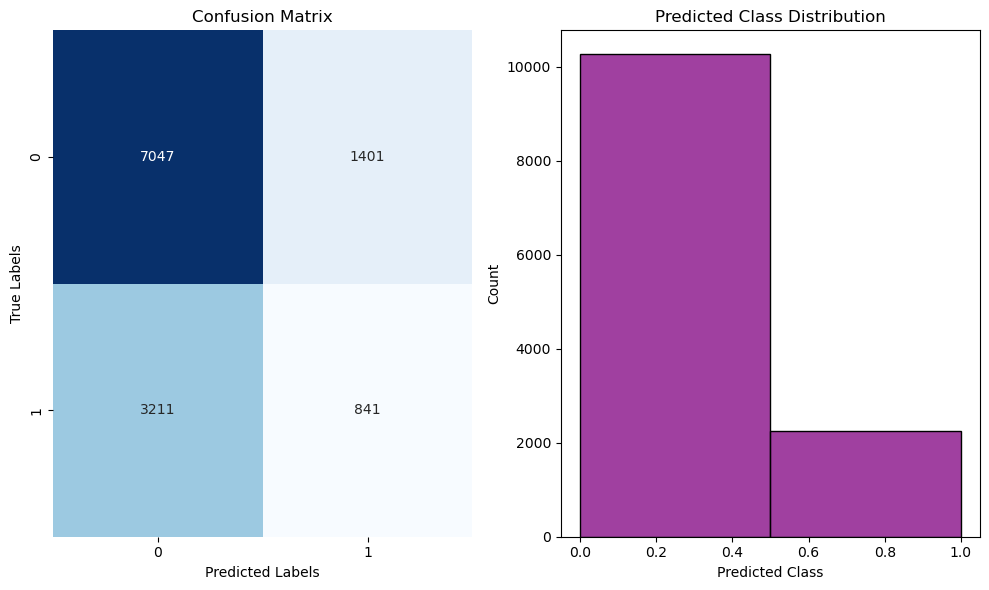

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = knn)

### Probablity based algo : NB

accuracy_score : 0.67584
Confusion matrix : 
[[8448    0]
 [4052    0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      8448
           1       0.00      0.00      0.00      4052

    accuracy                           0.68     12500
   macro avg       0.34      0.50      0.40     12500
weighted avg       0.46      0.68      0.55     12500



c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


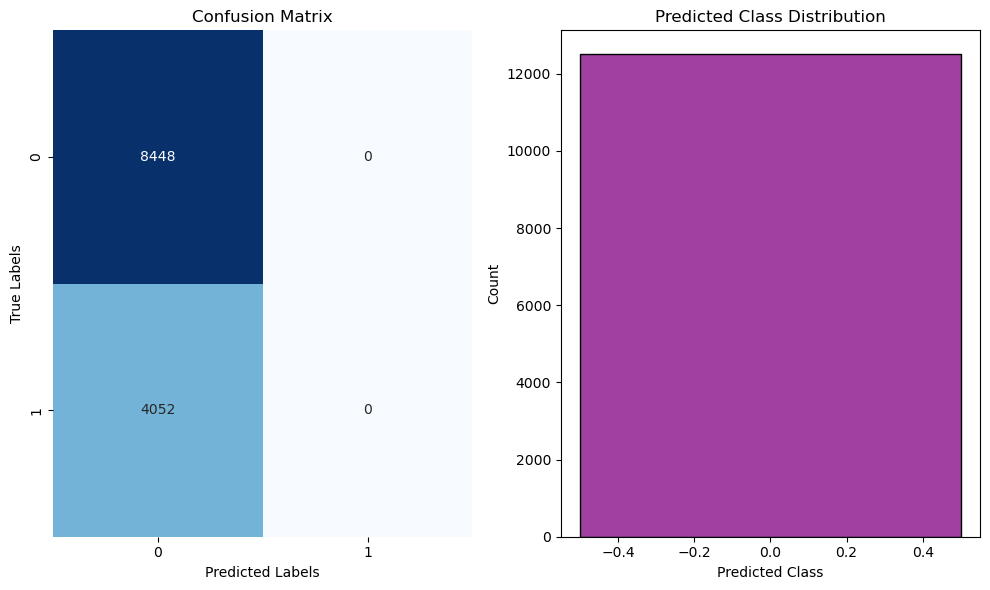

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = gnb)

### -----------------------Tree based algos------------------------

### 1. Decision tree

accuracy_score : 0.71704
Confusion matrix : 
[[6550 1898]
 [1639 2413]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      8448
           1       0.56      0.60      0.58      4052

    accuracy                           0.72     12500
   macro avg       0.68      0.69      0.68     12500
weighted avg       0.72      0.72      0.72     12500



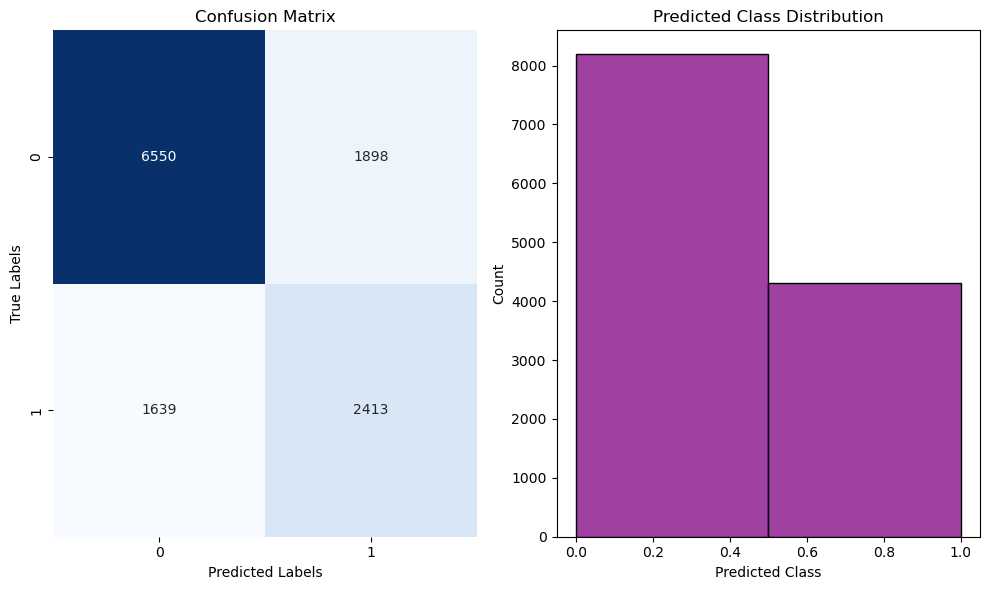

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = dtc)

### 2. Random forest 

accuracy_score : 0.82864
Confusion matrix : 
[[8448    0]
 [2142 1910]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8448
           1       1.00      0.47      0.64      4052

    accuracy                           0.83     12500
   macro avg       0.90      0.74      0.76     12500
weighted avg       0.86      0.83      0.81     12500



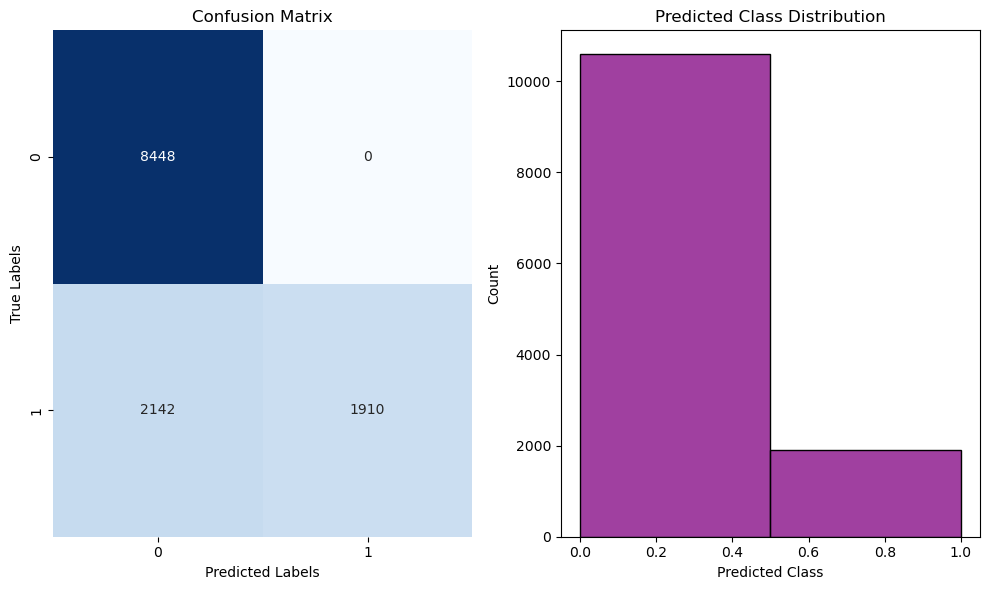

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = rfc)

### 3. Adaboost

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score : 0.82848
Confusion matrix : 
[[8445    3]
 [2141 1911]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8448
           1       1.00      0.47      0.64      4052

    accuracy                           0.83     12500
   macro avg       0.90      0.74      0.76     12500
weighted avg       0.86      0.83      0.81     12500



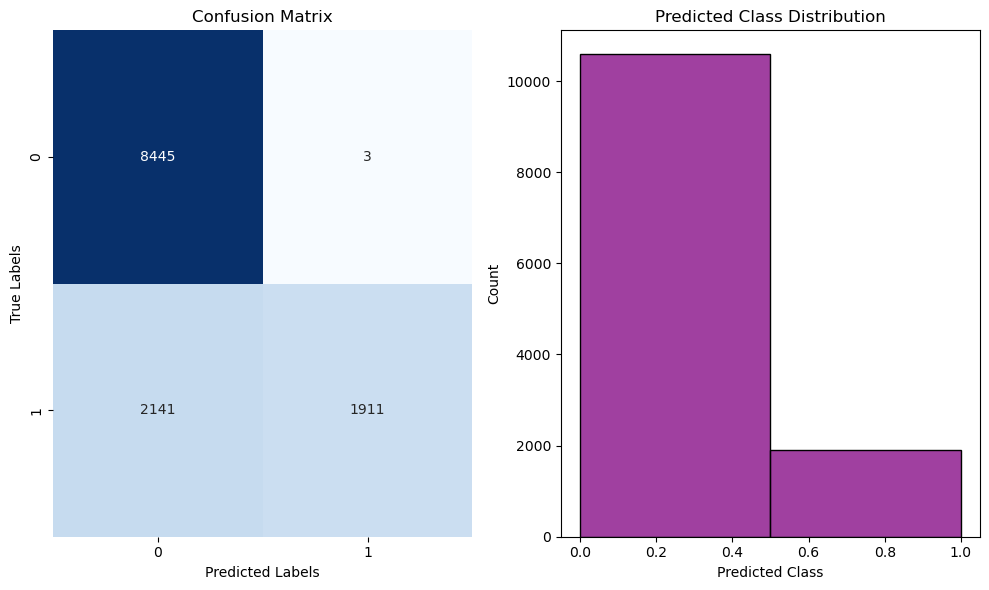

In [50]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = abc)

### 4. Gradient boost

accuracy_score : 0.82848
Confusion matrix : 
[[8446    2]
 [2142 1910]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8448
           1       1.00      0.47      0.64      4052

    accuracy                           0.83     12500
   macro avg       0.90      0.74      0.76     12500
weighted avg       0.86      0.83      0.81     12500



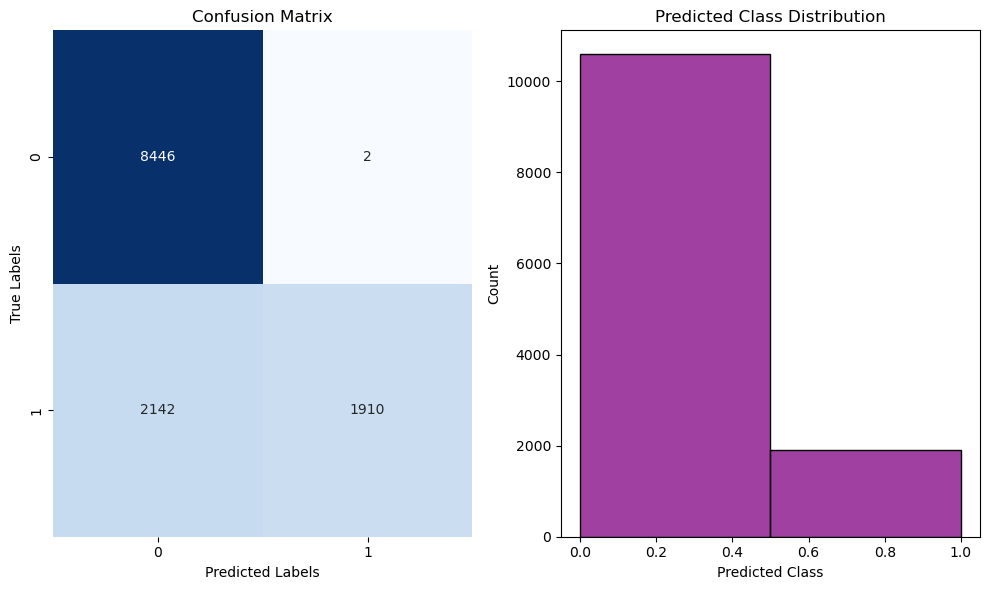

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = gbc)

### ANN

In [53]:
model = Sequential()

In [55]:
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = X_train_tree.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,945 (136.50 KB)

 Trainable params: 34,945 (136.50 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(X_train_distance, y_train_distance, batch_size = 64, epochs = 20, validation_split = 0.10)

Epoch 1/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7774 - loss: 0.5114 - val_accuracy: 0.8003 - val_loss: 0.4993
Epoch 2/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7814 - loss: 0.5054 - val_accuracy: 0.7992 - val_loss: 0.4980
Epoch 3/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7826 - loss: 0.5026 - val_accuracy: 0.8069 - val_loss: 0.4795
Epoch 4/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7885 - loss: 0.4938 - val_accuracy: 0.7736 - val_loss: 0.5145
Epoch 5/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7870 - loss: 0.4978 - val_accuracy: 0.8080 - val_loss: 0.4810
Epoch 6/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7908 - loss: 0.4868 - val_accuracy: 0.8029 - val_loss: 0.4719
Epoch 7/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7871 - loss: 0.4934 - val_accuracy: 0.7805 - val_loss: 0.5010
Epoch 8/20
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.4812 - val_accuracy: 0.

In [64]:
y_pred = model.predict(X_test_distance)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


In [61]:
y_pred

array([[0.19645897],
       [0.19351107],
       [0.19240524],
       ...,
       [0.19336845],
       [0.20039904],
       [0.19365175]], dtype=float32)

In [65]:
y_pred = (y_pred > 0.3).astype(int)

In [69]:
y_pred = y_pred.flatten()

In [70]:
metrices(y_test_distance, y_pred)

accuracy_score : 0.7712
Confusion matrix : 
[[8442    6]
 [2854 1198]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8448
           1       1.00      0.30      0.46      4052

    accuracy                           0.77     12500
   macro avg       0.87      0.65      0.66     12500
weighted avg       0.83      0.77      0.73     12500



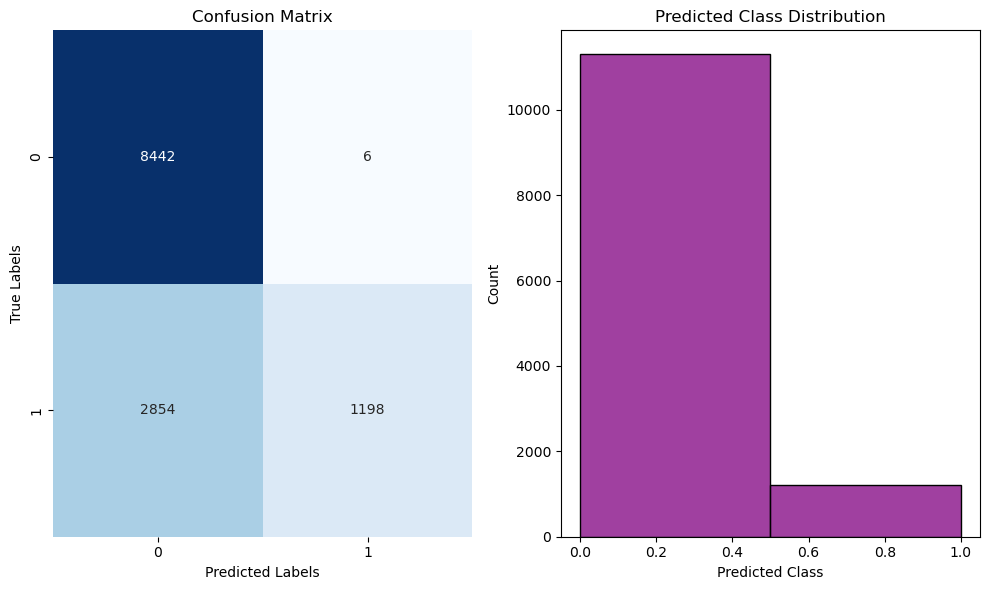

In [71]:
plot_graphs(y_test_distance, y_pred)

### ---------------------------Dropping the risk_score column-----------------------------------

In [84]:
X_distance.drop(['Unnamed: 0', 'Risk_Score'], axis = 1, inplace = True)
X_tree.drop(['Unnamed: 0', 'Risk_Score'], axis = 1, inplace = True)

In [85]:
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y_distance, random_state = 42, test_size = 0.25)

In [86]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, random_state = 42, test_size = 0.25)

In [87]:
print(f"{X_train_distance.shape} : {X_test_distance.shape} :: {y_train_distance.shape} : {y_test_distance.shape}")

(37500, 27) : (12500, 27) :: (37500,) : (12500,)


In [88]:
print(f"{X_train_tree.shape} : {X_test_tree.shape} :: {y_train_tree.shape} : {y_test_tree.shape}")

(37500, 27) : (12500, 27) :: (37500,) : (12500,)


### --------------distance based algos------------------

### 1. Logitic regression

accuracy_score : 0.8744
Confusion matrix : 
[[8388   60]
 [1510 2542]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      8448
           1       0.98      0.63      0.76      4052

    accuracy                           0.87     12500
   macro avg       0.91      0.81      0.84     12500
weighted avg       0.89      0.87      0.87     12500



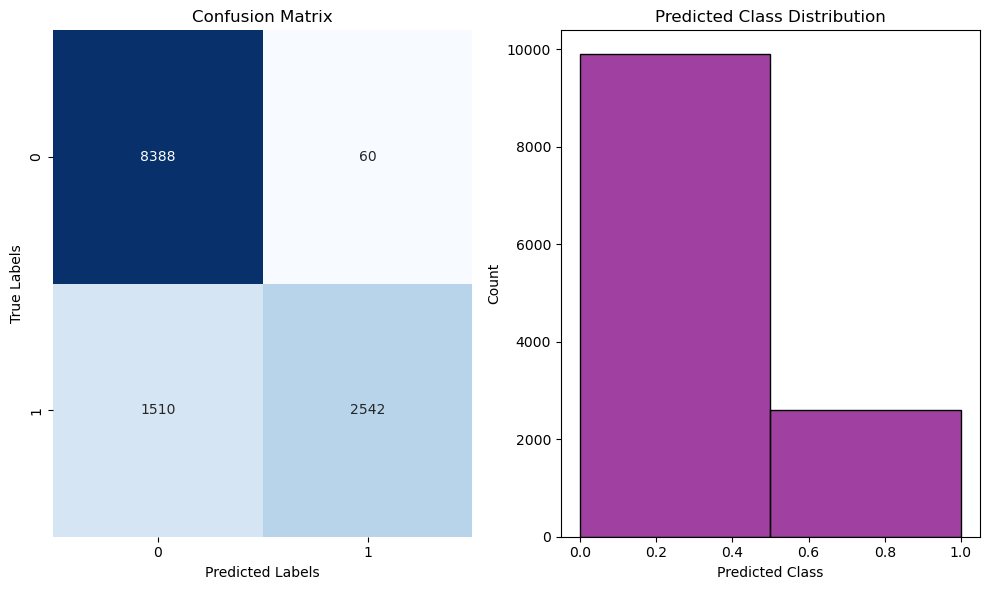

In [90]:
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = lr)

### 2. SVC

accuracy_score : 0.7384
Confusion matrix : 
[[8448    0]
 [3270  782]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      8448
           1       1.00      0.19      0.32      4052

    accuracy                           0.74     12500
   macro avg       0.86      0.60      0.58     12500
weighted avg       0.81      0.74      0.67     12500



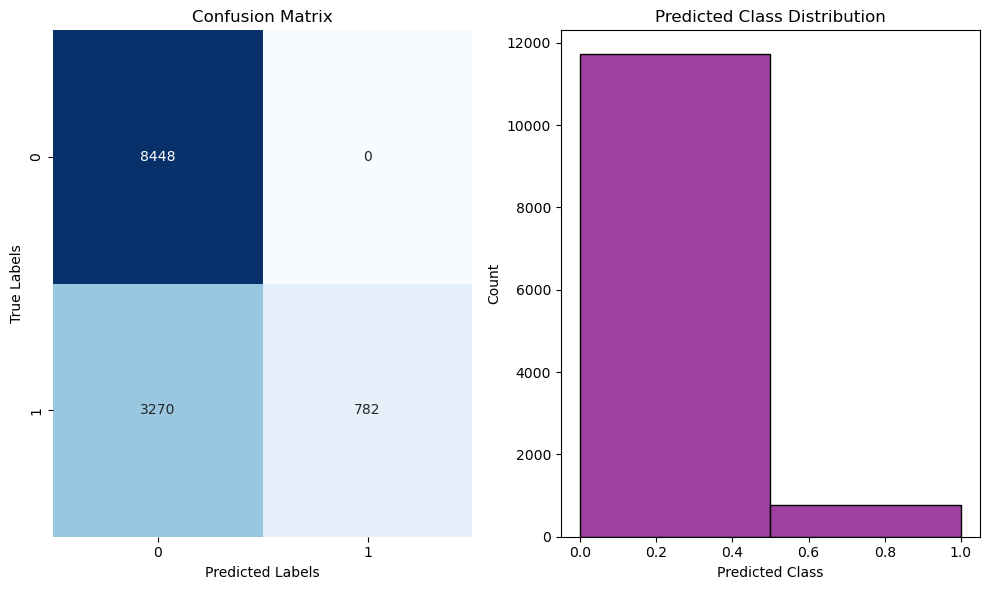

In [91]:
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = svc)

### 3. KNN

accuracy_score : 0.80656
Confusion matrix : 
[[7773  675]
 [1743 2309]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      8448
           1       0.77      0.57      0.66      4052

    accuracy                           0.81     12500
   macro avg       0.80      0.74      0.76     12500
weighted avg       0.80      0.81      0.80     12500



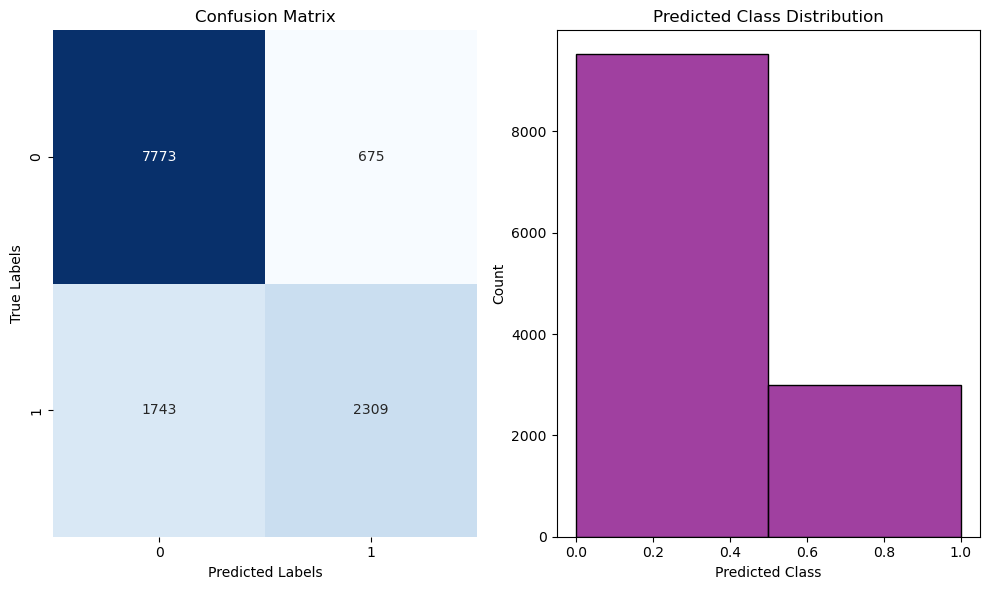

In [92]:
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = knn)

### Probablity based : NB

accuracy_score : 0.87808
Confusion matrix : 
[[8448    0]
 [1524 2528]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8448
           1       1.00      0.62      0.77      4052

    accuracy                           0.88     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.90      0.88      0.87     12500



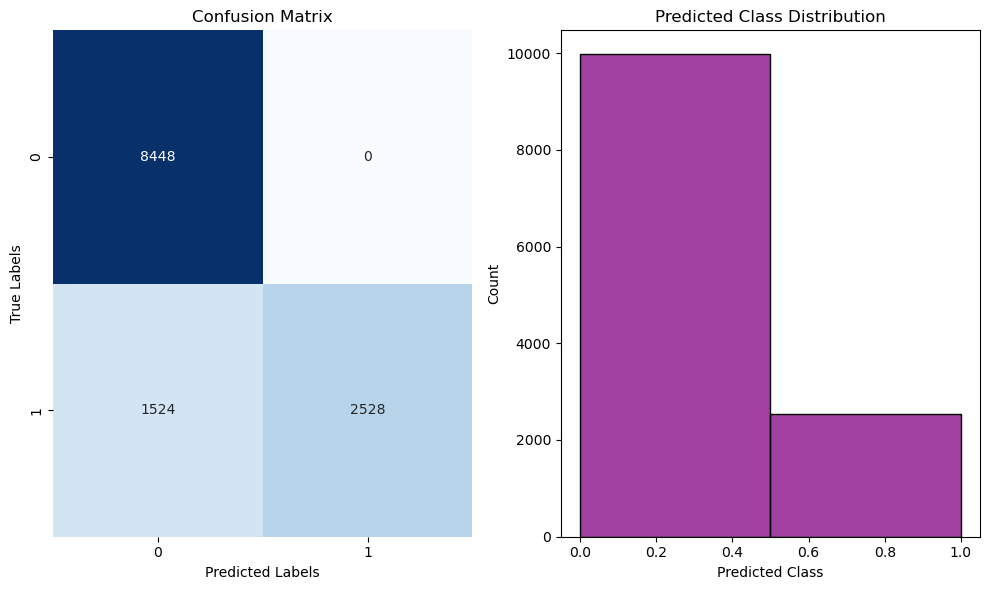

In [93]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = gnb)

### --------------------tree based algos--------------------------

### 1. Decision tree

accuracy_score : 0.77632
Confusion matrix : 
[[6897 1551]
 [1245 2807]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      8448
           1       0.64      0.69      0.67      4052

    accuracy                           0.78     12500
   macro avg       0.75      0.75      0.75     12500
weighted avg       0.78      0.78      0.78     12500



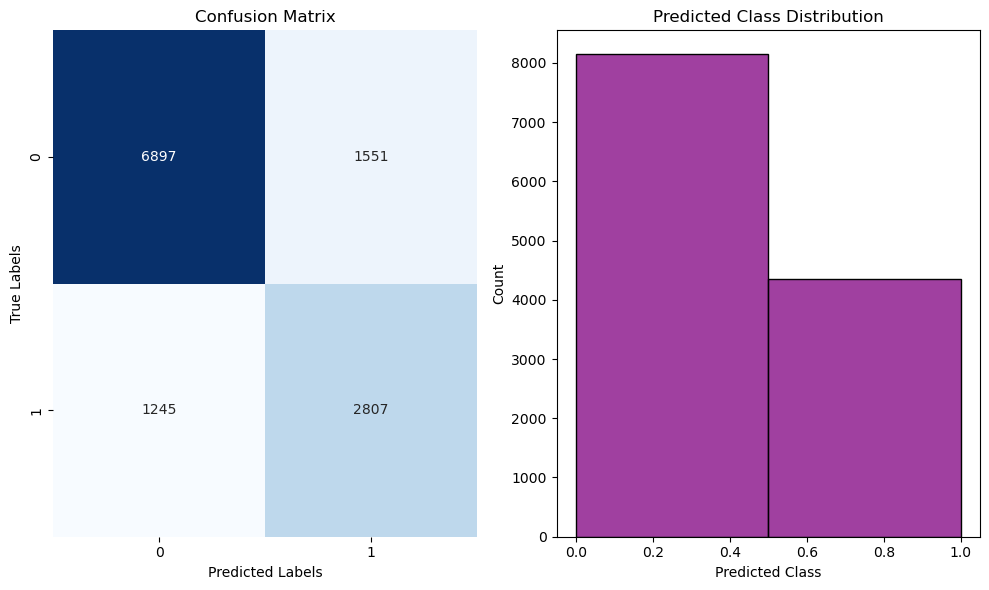

In [94]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = dtc)

### 2. Random forest

accuracy_score : 0.878
Confusion matrix : 
[[8447    1]
 [1524 2528]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8448
           1       1.00      0.62      0.77      4052

    accuracy                           0.88     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.90      0.88      0.87     12500



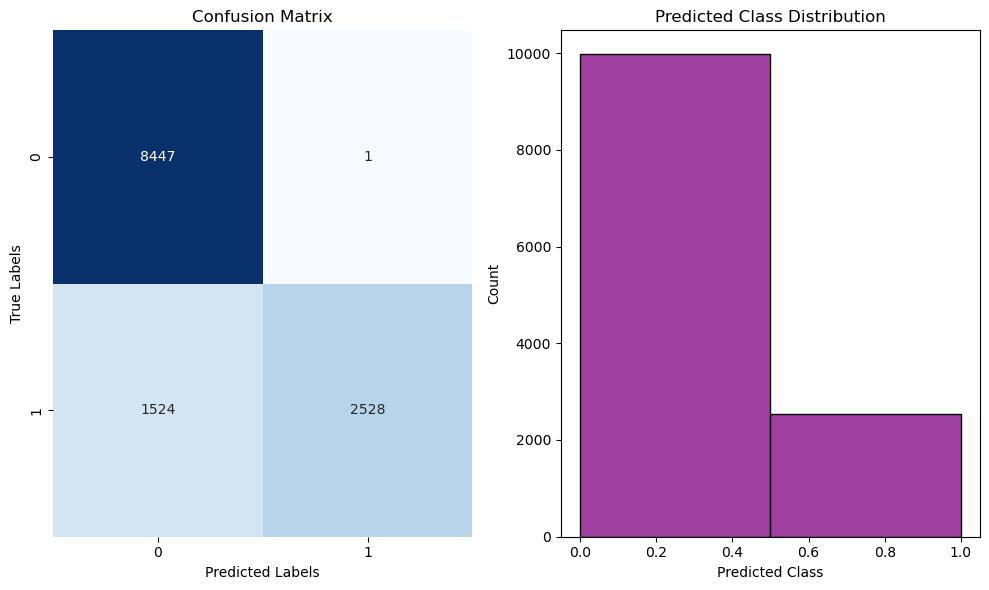

In [95]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = rfc)

### 3. Adaboost

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score : 0.87816
Confusion matrix : 
[[8447    1]
 [1522 2530]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8448
           1       1.00      0.62      0.77      4052

    accuracy                           0.88     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.90      0.88      0.87     12500



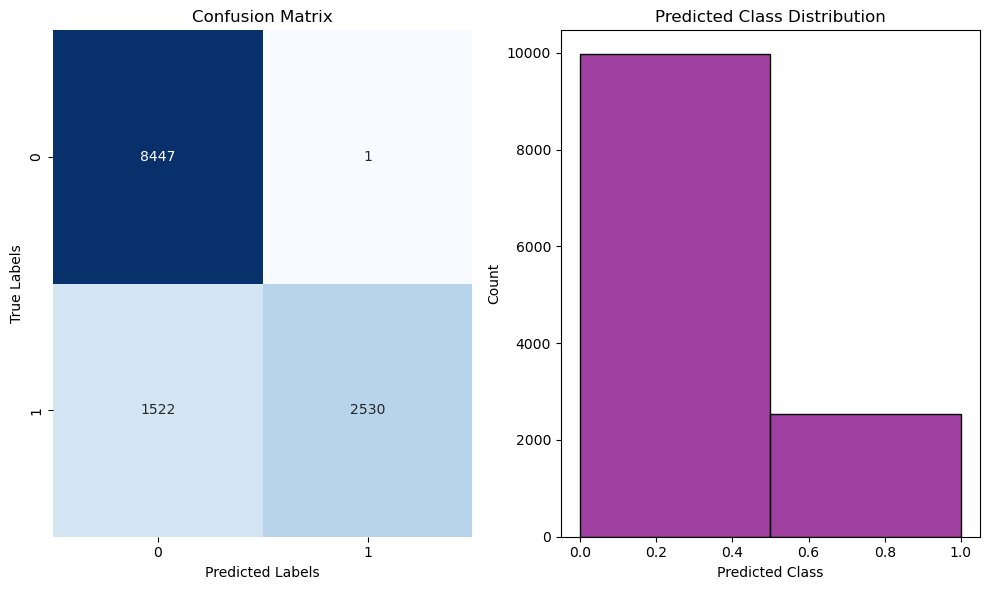

In [96]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = abc)

### 4. Gradient boost

accuracy_score : 0.87784
Confusion matrix : 
[[8444    4]
 [1523 2529]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8448
           1       1.00      0.62      0.77      4052

    accuracy                           0.88     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.90      0.88      0.87     12500



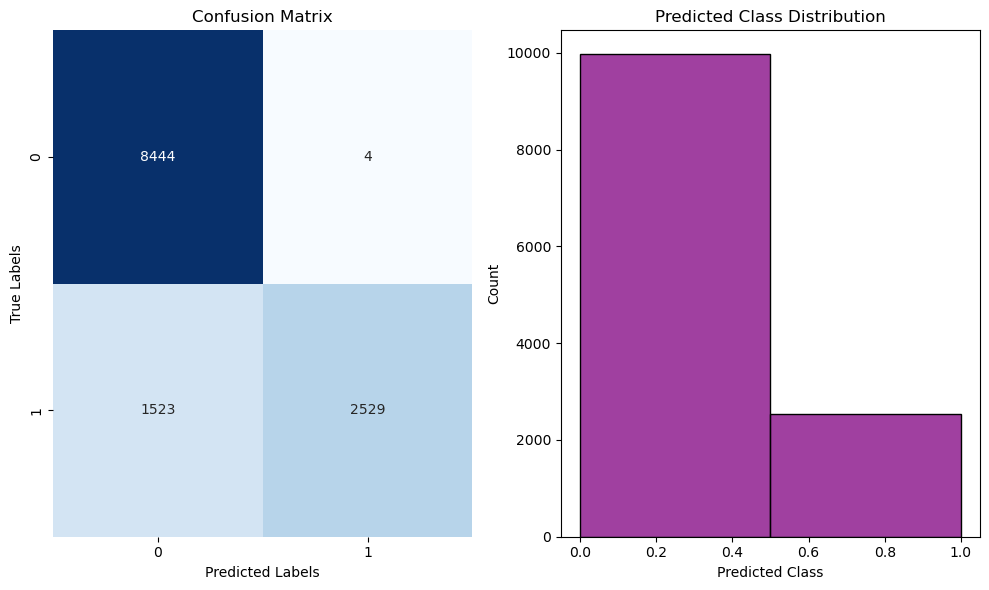

In [97]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = gbc)

### ANN

In [98]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,837 (409.52 KB)

 Trainable params: 34,945 (136.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,892 (273.02 KB)

In [100]:
model.fit(X_train_distance, y_train_distance, batch_size = 64, epochs = 30, validation_split = 0.1)

Epoch 1/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.3457 - val_accuracy: 0.8395 - val_loss: 0.4207
Epoch 2/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8737 - loss: 0.3519 - val_accuracy: 0.8701 - val_loss: 0.3643
Epoch 3/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.3480 - val_accuracy: 0.8819 - val_loss: 0.3365
Epoch 4/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.3640 - val_accuracy: 0.8795 - val_loss: 0.3437
Epoch 5/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.3443 - val_accuracy: 0.8813 - val_loss: 0.3388
Epoch 6/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3468 - val_accuracy: 0.8603 - val_loss: 0.3788
Epoch 7/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8718 - loss: 0.3523 - val_accuracy: 0.8736 - val_loss: 0.3745
Epoch 8/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3431 - val_accuracy: 0.

In [101]:
y_pred = model.predict(X_test_distance)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


In [102]:
y_pred

array([[0.14839463],
       [0.15448053],
       [0.15186948],
       ...,
       [0.99988204],
       [0.15545705],
       [0.14816305]], dtype=float32)

In [103]:
y_pred = (y_pred > 0.3).astype(int)

In [105]:
y_pred = y_pred.flatten()

In [104]:
metrices(y_test_distance, y_pred)

accuracy_score : 0.87792
Confusion matrix : 
[[8448    0]
 [1526 2526]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8448
           1       1.00      0.62      0.77      4052

    accuracy                           0.88     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.90      0.88      0.87     12500



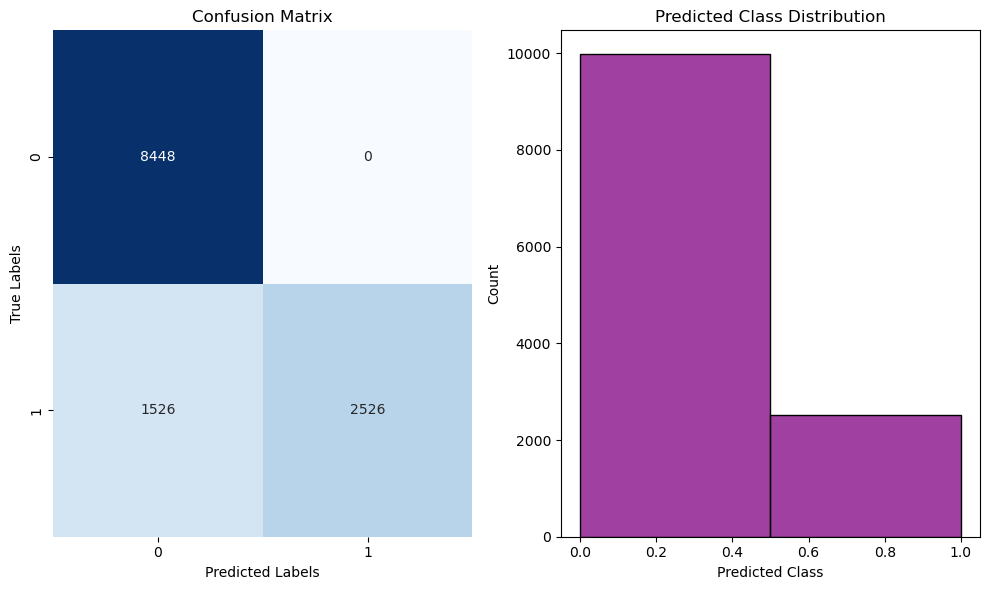

In [106]:
plot_graphs(y_test_distance, y_pred)